# Проект: Принятие решений в бизнесе

Вы — аналитик крупного интернет-магазина. Вместе с отделом маркетинга вы подготовили список гипотез для увеличения выручки.
Приоритизируйте гипотезы, запустите A/B-тест и проанализируйте результаты. 

**Цель исследования:**
1. Приоритизировать гипотизы, чтобы выделить максимально вероятные для увеличения выручки компании.
2. Проанализитровать запущенный ранее компанией A/B-тест, принять решение по результатам теста и объяснить его

**Ход исследования:**
Данные я получу из файлов `hypothesis.csv`, `orders.csv`, `visitors.csv`. О качестве данных ничего не известно. Поэтому перед тем, как приступать к целям исследования, потребуется обзор данных.

Я проверю данные и их типы на ошибки/неточности и оценю их влияние на исследование. Затем, на этапе предобработки, я поищу возможность исправить все ошибки данных, которые не приведут к искажению конечного результата. Далее создам необходимые столбцы и приступлю к проведению анализа.

Таким образом, мое исследование пройдет в 5 этапов:
- Обзор данных
- Предобработка данных
- Приоритизация гипотез
- Анализ A/B-теста
- Написание общего вывода

###  Обзор данных

In [1]:
# Импортируем библиотеки
import pandas as pd
import numpy as np
from datetime import datetime, timedelta
from matplotlib import pyplot as plt
import scipy.stats as stats

In [2]:
hypothesis = pd.read_csv('hypothesis.csv')
orders = pd.read_csv('orders.csv')
visitors = pd.read_csv('visitors.csv')

In [3]:
hypothesis.info()
hypothesis.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Hypothesis  9 non-null      object
 1   Reach       9 non-null      int64 
 2   Impact      9 non-null      int64 
 3   Confidence  9 non-null      int64 
 4   Efforts     9 non-null      int64 
dtypes: int64(4), object(1)
memory usage: 488.0+ bytes


,Hypothesis,Reach,Impact,Confidence,Efforts
0,"Добавить два новых канала привлечения трафика,...",3,10,8,6
1,"Запустить собственную службу доставки, что сок...",2,5,4,10
2,Добавить блоки рекомендаций товаров на сайт ин...,8,3,7,3
3,"Изменить структура категорий, что увеличит кон...",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы уве...",3,1,1,1


In [4]:
orders.info()
orders.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   transactionId  1197 non-null   int64 
 1   visitorId      1197 non-null   int64 
 2   date           1197 non-null   object
 3   revenue        1197 non-null   int64 
 4   group          1197 non-null   object
dtypes: int64(3), object(2)
memory usage: 46.9+ KB


,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B


In [5]:
visitors.info()
visitors.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   date      62 non-null     object
 1   group     62 non-null     object
 2   visitors  62 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 1.6+ KB


,date,group,visitors
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756


**При первом взгляде на данные можно сказать, что:**

- нет пропущенных значений в трех датасетах
- название столбцов в датасете hypothesis необходимо привести к нижнему змеиному регистру
- столбцы date в датасетах orders и visitors необходимо заменить тип на datetime для дальнейшей работы со временем.

###  Предобработка данных

In [6]:
#Приводим названия столбцов датасетов к нижнему змеиному регистру
hypothesis = hypothesis.rename(
    columns={
        'Hypothesis': 'hypothesis',
        'Reach': 'reach',
        'Impact': 'impact',
        'Confidence': 'confidence',
        'Efforts': 'efforts'
    }
)


# преобразование данных о времени
orders['date'] = pd.to_datetime(orders['date'])
visitors['date'] = pd.to_datetime(visitors['date'])

hypothesis.info()
print(orders.head())
visitors.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   hypothesis  9 non-null      object
 1   reach       9 non-null      int64 
 2   impact      9 non-null      int64 
 3   confidence  9 non-null      int64 
 4   efforts     9 non-null      int64 
dtypes: int64(4), object(1)
memory usage: 488.0+ bytes
   transactionId   visitorId       date  revenue group
0     3667963787  3312258926 2019-08-15     1650     B
1     2804400009  3642806036 2019-08-15      730     B
2     2961555356  4069496402 2019-08-15      400     A
3     3797467345  1196621759 2019-08-15     9759     B
4     2282983706  2322279887 2019-08-15     2308     B


,date,group,visitors
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756


**Проверяем на явные дубликаты**

In [7]:
print(hypothesis.duplicated().sum())
print(orders.duplicated().sum())
visitors.duplicated().sum()

0
0


0

**Проверяем на неявные дубликаты**

In [8]:
print(visitors['group'].sort_values().unique())
orders['group'].sort_values().unique()


['A' 'B']


array(['A', 'B'], dtype=object)

**Результат предобработки:**

- нет пропущенных значений в трех датасетах
- название столбцов в датасете hypothesis приведены к нижнему змеиному регистру
- в столбцах date в датасетах visiors, orders заменен тип на datetime для дальнейшей работы со временем
- осуществлена проверка на явные и неявные дубликаты - они отсутстуют

In [9]:
double_id = orders.groupby('visitorId', as_index=False).agg({'group': 'nunique'})
double_id.columns=['userId', 'group_cnt']
double_id = double_id.query('group_cnt > 1')
print(double_id)
print(orders)
ids = double_id['userId']
orders = orders.query('visitorId not in @ids').reset_index()
print(orders)

          userId  group_cnt
2        8300375          2
44     199603092          2
51     232979603          2
55     237748145          2
66     276558944          2
84     351125977          2
97     393266494          2
114    457167155          2
119    471551937          2
122    477780734          2
192    818047933          2
236    963407295          2
299   1230306981          2
311   1294878855          2
316   1316129916          2
318   1333886533          2
340   1404934699          2
386   1602967004          2
393   1614305549          2
402   1648269707          2
406   1668030113          2
422   1738359350          2
436   1801183820          2
469   1959144690          2
487   2038680547          2
491   2044997962          2
569   2378935119          2
591   2458001652          2
614   2579882178          2
619   2587333274          2
622   2600415354          2
639   2654030115          2
648   2686716486          2
661   2712142231          2
662   2716752286    

###  Приоритизация гипотез

**3.1 Примените фреймворк ICE для приоритизации гипотез. Отсортируйте их по убыванию приоритета.**

In [10]:
hypothesis

,hypothesis,reach,impact,confidence,efforts
0,"Добавить два новых канала привлечения трафика,...",3,10,8,6
1,"Запустить собственную службу доставки, что сок...",2,5,4,10
2,Добавить блоки рекомендаций товаров на сайт ин...,8,3,7,3
3,"Изменить структура категорий, что увеличит кон...",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы уве...",3,1,1,1
5,"Добавить страницу отзывов клиентов о магазине,...",3,2,2,3
6,Показать на главной странице баннеры с актуаль...,5,3,8,3
7,Добавить форму подписки на все основные страни...,10,7,8,5
8,"Запустить акцию, дающую скидку на товар в день...",1,9,9,5


In [11]:
hypothesis['ice'] = hypothesis['impact'] * hypothesis['confidence'] / hypothesis['efforts']
pd.options.display.max_colwidth = 1
display(hypothesis[['hypothesis', 'ice']].sort_values(by='ice', ascending=False))

,hypothesis,ice
8,"Запустить акцию, дающую скидку на товар в день рождения",16.200000
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",13.333333
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",11.200000
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",8.000000
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",7.000000
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2.000000
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",1.333333
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",1.125000
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",1.000000


Наиболее перспективные гипотезы - 8, 0, 7

**3.2 Примените фреймворк RICE для приоритизации гипотез. Отсортируйте их по убыванию приоритета.**

In [12]:
hypothesis['rice'] = hypothesis['reach'] * hypothesis['impact'] * hypothesis['confidence'] / hypothesis['efforts']
print(hypothesis[['hypothesis', 'rice']].sort_values(by='rice', ascending=False))

                                                                                                     hypothesis  \
7  Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок               
2  Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа   
0  Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей             
6  Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию           
8  Запустить акцию, дающую скидку на товар в день рождения                                                        
3  Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар            
1  Запустить собственную службу доставки, что сократит срок доставки заказов                                      
5  Добавить страницу отзывов клиентов о магазине, что позволит увеличить количес

Наиболее перспективные гипотезы - 7, 2, 0, 6

**3.3 Укажите, как изменилась приоритизация гипотез при применении RICE вместо ICE. Объясните, почему так произошло.**

Приоритизация гипотез при применении RICE вместо ICE, обусловлена тем что в фреймворке RICE мы учитываем параметр - Reach (скольких пользователей затронет изменение, которое мы хотим внести), и в гипотезе 7 он высок, что вывело ее на первые позиции.Также как в сместило вниз лидеров ICE 8 и 0.

**Вывод:** Наиболее перспективной является гипотеза 7, она в лидерах после приоритезации в обоих фреймворках. Также можно еще рассмотреть 0-ую гипотезу по совокупности результатов приоритизации RICE, ICE.

###  Приоритизация гипотез

**4.1 Постройте график кумулятивной выручки по группам. Сделайте выводы и предположения.**

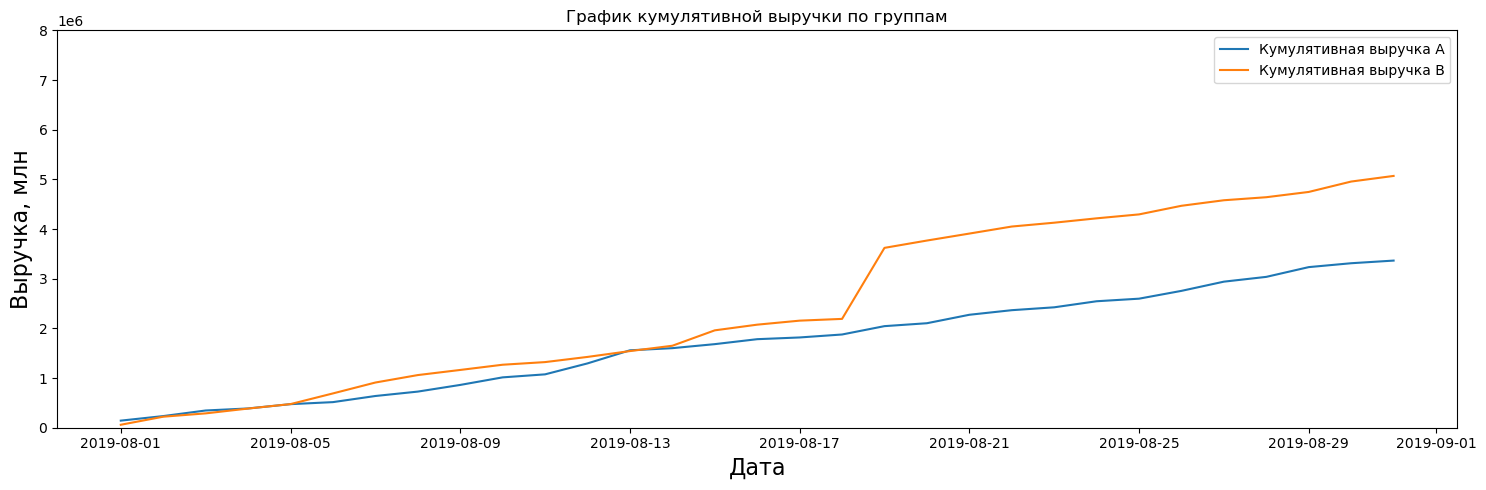

In [13]:
datesGroups = orders[['date', 'group']].drop_duplicates()
ordersAggregated = datesGroups.apply(lambda x: orders[np.logical_and(orders['date'] <= x['date'], orders['group'] == x['group'])]\
.agg({'date' : 'max', 'group' : 'max', 'transactionId' : 'nunique', 'visitorId' : 'nunique', 'revenue' : 'sum'}), axis=1).sort_values(by=['date','group'])
visitorsAggregated = datesGroups.apply(lambda x: visitors[np.logical_and(visitors['date'] <= x['date'], visitors['group'] == x['group'])].agg({'date' : 'max', 'group' : 'max', 'visitors' : 'sum'}), axis=1).sort_values(by=['date','group']) 

cumulativeData = ordersAggregated.merge(visitorsAggregated, left_on=['date', 'group'], right_on=['date', 'group'])
cumulativeData.columns = ['date', 'group', 'orders', 'buyers', 'revenue', 'visitors']

# датафрейм с кумулятивным количеством заказов и кумулятивной выручкой по дням в группе А
cumulativeRevenueA = cumulativeData[cumulativeData['group']=='A'][['date','revenue', 'orders']]

# датафрейм с кумулятивным количеством заказов и кумулятивной выручкой по дням в группе B
cumulativeRevenueB = cumulativeData[cumulativeData['group']=='B'][['date','revenue', 'orders']]

# Строим график выручки группы А
plt.figure(figsize=(15,5))
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue'], label='Кумулятивная выручка A')

# Строим график выручки группы B
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue'], label='Кумулятивная выручка B')
plt.legend()
# добавляем подписи к осям и заголовок диаграммы
plt.xlabel('Дата', fontsize=16)
plt.ylabel('Выручка, млн', fontsize=16)
plt.title('График кумулятивной выручки по группам')

# задаем диапазон значений оси y
plt.ylim([0, 8000000])
# оптимизируем поля и расположение объектов
plt.tight_layout()

plt.show()


В течение всего периода видно, что кумулятивная выручка группы В выше и растет быстрее, чем в группе А.Особенно после 17 августа. Скорее всего вырос средний чек покупки группы B, отсюда и такой скачок.

**4.2 Постройте график кумулятивного среднего чека по группам. Сделайте выводы и предположения.**

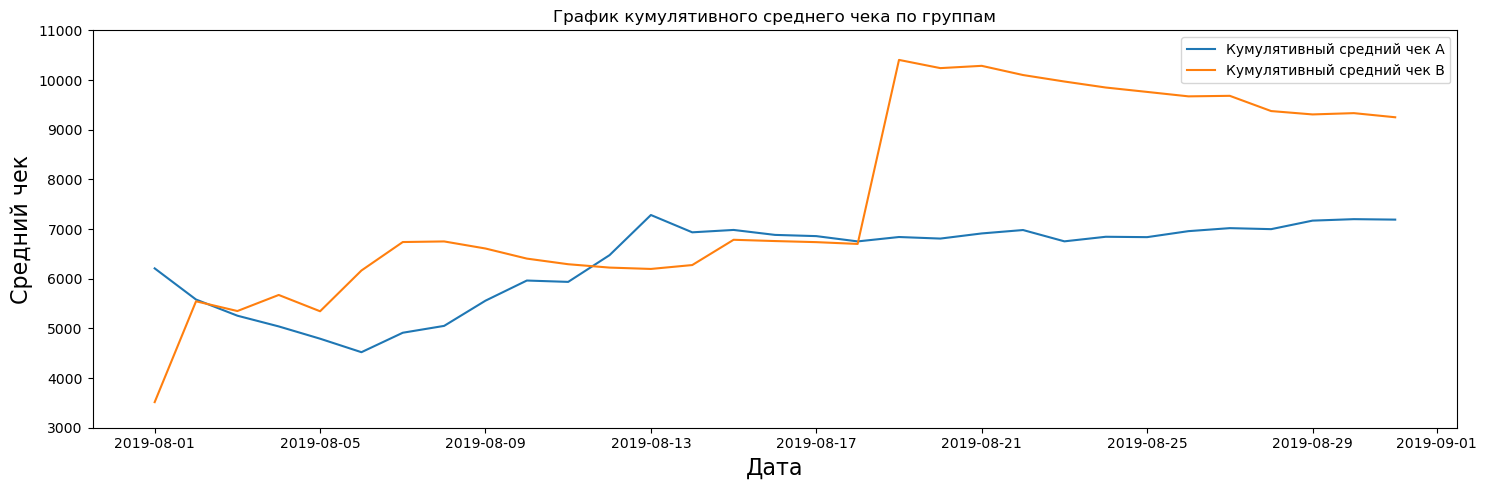

In [14]:
plt.figure(figsize=(15,5))
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue']/cumulativeRevenueA['orders'], label='Кумулятивный средний чек A')
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue']/cumulativeRevenueB['orders'], label='Кумулятивный средний чек B')
plt.legend() 
# добавляем подписи к осям и заголовок диаграммы
plt.xlabel('Дата', fontsize=16)
plt.ylabel('Средний чек', fontsize=16)
plt.title('График кумулятивного среднего чека по группам')

# задаем диапазон значений оси y
plt.ylim([3000, 11000])
# оптимизируем поля и расположение объектов
plt.tight_layout()

plt.show()

По среднему чеку видно, что толтко в период 12-14 августа средний чек группы А превышал группу В. И также хорошо видно, что начиная с 18-19 августа средний чек группы В значительно повысился, хоть потом он шел на снижение, но все равно не опускался до предыдущих значений и был выше группы А.

**4.3 Постройте график относительного изменения кумулятивного среднего чека группы B к группе A. Сделайте выводы и предположения.**

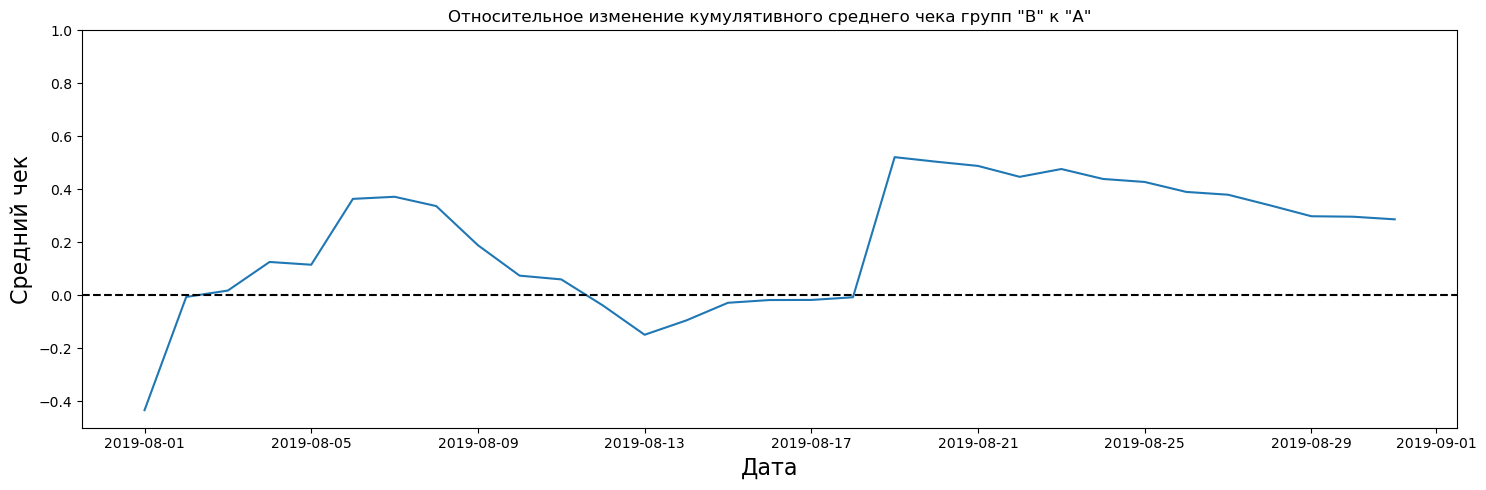

In [15]:
# собираем данные в одном датафрейме
mergedCumulativeRevenue = cumulativeRevenueA.merge(cumulativeRevenueB, left_on='date', right_on='date', how='left', suffixes=['A', 'B'])

# cтроим отношение средних чеков
plt.figure(figsize=(15,5))
plt.plot(mergedCumulativeRevenue['date'], (mergedCumulativeRevenue['revenueB']/mergedCumulativeRevenue['ordersB'])/(mergedCumulativeRevenue['revenueA']/mergedCumulativeRevenue['ordersA'])-1)
plt.title('Относительное изменение кумулятивного среднего чека групп "B" к "А"')
# добавляем ось X
plt.axhline(y=0, color='black', linestyle='--') 
# добавляем подписи к осям и заголовок диаграммы
plt.xlabel('Дата', fontsize=16)
plt.ylabel('Средний чек', fontsize=16)

# задаем диапазон значений оси y
plt.ylim([-0.5, 1])
# оптимизируем поля и расположение объектов
plt.tight_layout()

plt.show()

Результаты теста В значительно превышают результаты теста А. Только в период с 12-15 августа прослеживается спад. Возможно в это время были сделаны заказы с аномально маленькими значениями.

**4.4 Постройте график кумулятивного среднего количества заказов на посетителя по группам. Сделайте выводы и предположения.**

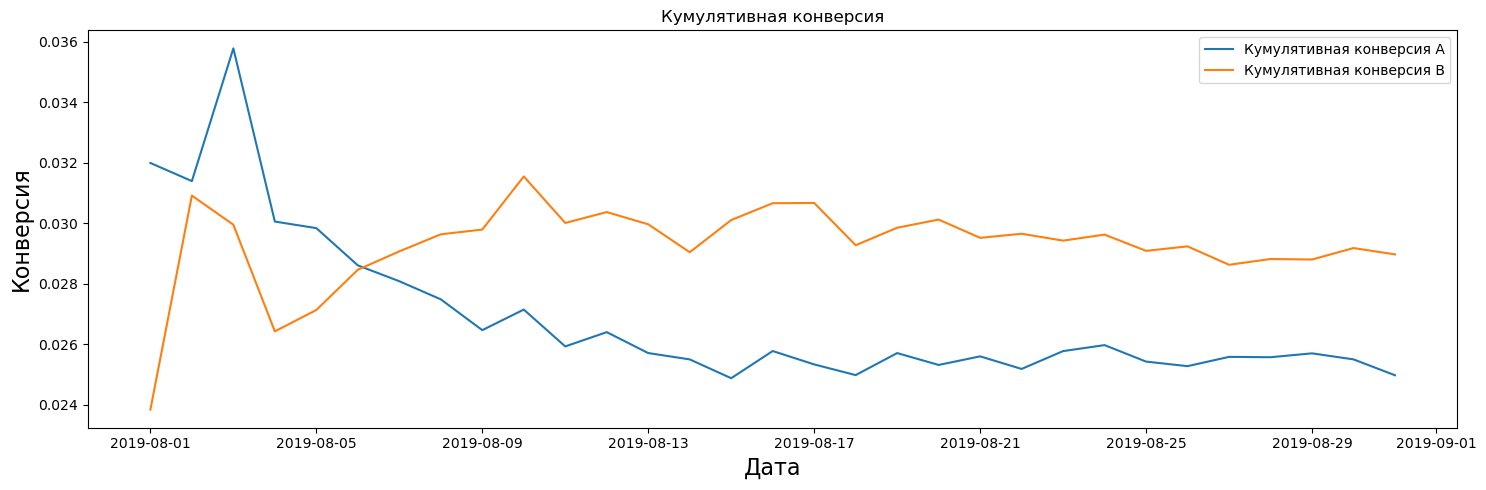

In [16]:

# считаем кумулятивную конверсию
cumulativeData['conversion'] = cumulativeData['orders']/cumulativeData['visitors']

# отделяем данные по группе A
cumulativeDataA = cumulativeData[cumulativeData['group']=='A']

# отделяем данные по группе B
cumulativeDataB = cumulativeData[cumulativeData['group']=='B']

# строим графики
plt.figure(figsize=(15,5))
plt.plot(cumulativeDataA['date'], cumulativeDataA['conversion'], label='Кумулятивная конверсия A')
plt.plot(cumulativeDataB['date'], cumulativeDataB['conversion'], label='Кумулятивная конверсия B')
plt.legend()
plt.title('Кумулятивная конверсия')
# добавляем подписи к осям и заголовок диаграммы
plt.xlabel('Дата', fontsize=16)
plt.ylabel('Конверсия', fontsize=16)


# оптимизируем поля и расположение объектов
plt.tight_layout()

plt.show()



Конверсия группы B, также не считая колебвний первых дней теста значитеельно выше конверсии группы А.

**4.5 Постройте график относительного изменения кумулятивного среднего количества заказов на посетителя группы B к группе A. Сделайте выводы и предположения.**

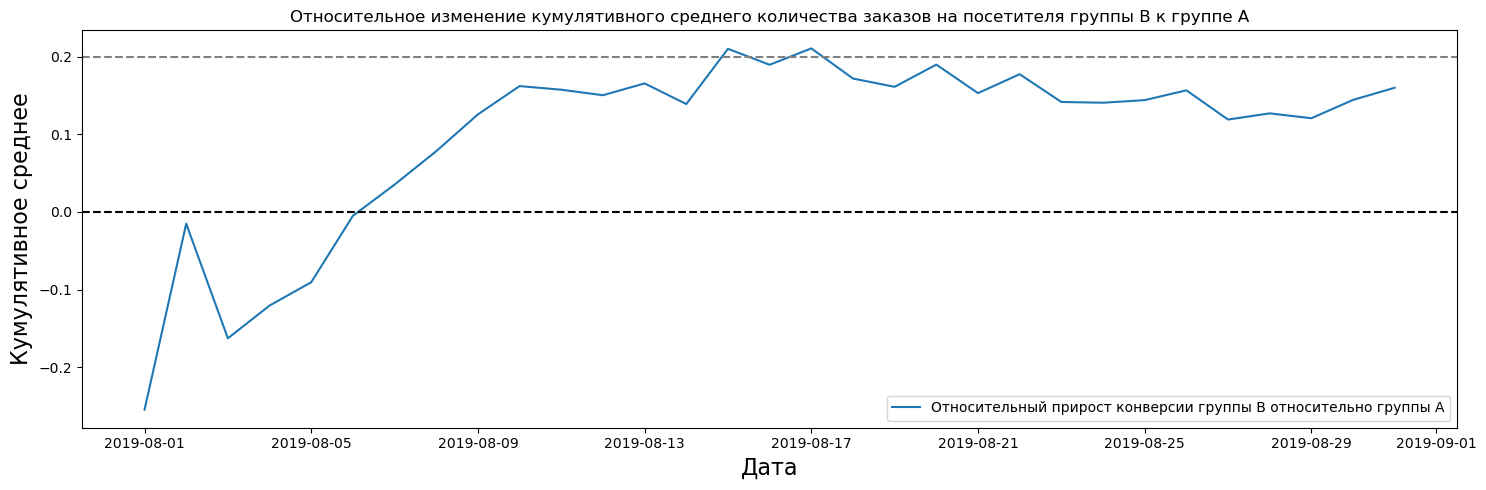

In [17]:
mergedCumulativeConversions = cumulativeDataA[['date','conversion']].merge(cumulativeDataB[['date','conversion']], left_on='date', right_on='date', how='left', suffixes=['A', 'B'])
plt.figure(figsize=(15,5))
plt.plot(mergedCumulativeConversions['date'], mergedCumulativeConversions['conversionB']/mergedCumulativeConversions['conversionA']-1, label="Относительный прирост конверсии группы B относительно группы A")
plt.legend()
plt.title('Относительное изменение кумулятивного среднего количества заказов на посетителя группы B к группе A')
plt.axhline(y=0, color='black', linestyle='--')
plt.axhline(y=0.2, color='grey', linestyle='--')
# добавляем подписи к осям и заголовок диаграммы
plt.xlabel('Дата', fontsize=16)
plt.ylabel('Кумулятивное среднее', fontsize=16)


# оптимизируем поля и расположение объектов
plt.tight_layout()

plt.show()





Почти с самого начала теста группа В лидирует по конверсии: становится лучше, после 17 августа немного снижается, но не опускается ниже 10% относительно группы А

**4.6 Постройте точечный график количества заказов по пользователям. Сделайте выводы и предположения.**

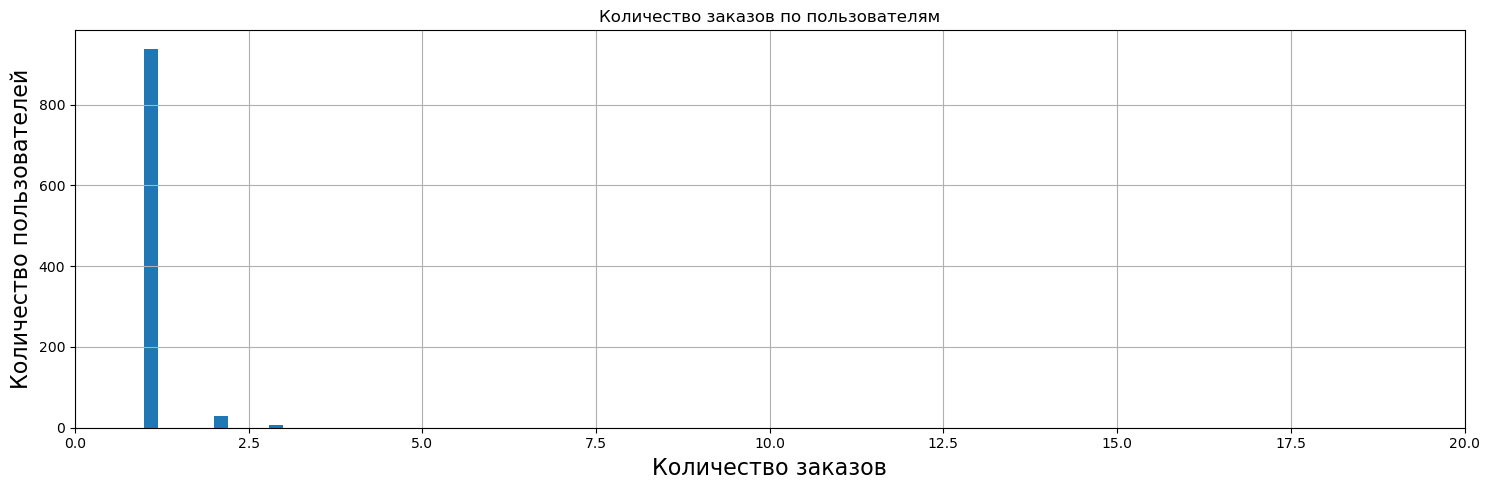

In [18]:
ordersByUsers = (
    orders.groupby('visitorId', as_index=False)
    .agg({'transactionId': 'nunique'})
)

ordersByUsers.columns = ['userId', 'orders']
plt.figure(figsize=(15,5))
plt.grid()
plt.title('Количество заказов по пользователям')
plt.hist(ordersByUsers['orders']) 
# добавляем подписи к осям и заголовок диаграммы
plt.xlabel('Количество заказов', fontsize=16)
plt.ylabel('Количество пользователей', fontsize=16)
plt.xlim([0, 20])

# оптимизируем поля и расположение объектов
plt.tight_layout()

plt.show()


Больше всего пользователей которые совершили 1 - 3 заказf. Все что выше 3 заказов - явно уже аномалия.

**4.7 Посчитайте 95-й и 99-й перцентили количества заказов на пользователя. Выберите границу для определения аномальных пользователей.**

In [19]:
np.percentile(ordersByUsers['orders'], [95, 99])

array([1., 2.])

Не более 95% пользователей совершали более 2 заказов и не более 99% совершали более 4 заказов. Граница - 3 заказа.

**4.8 Постройте точечный график стоимостей заказов. Сделайте выводы и предположения.**

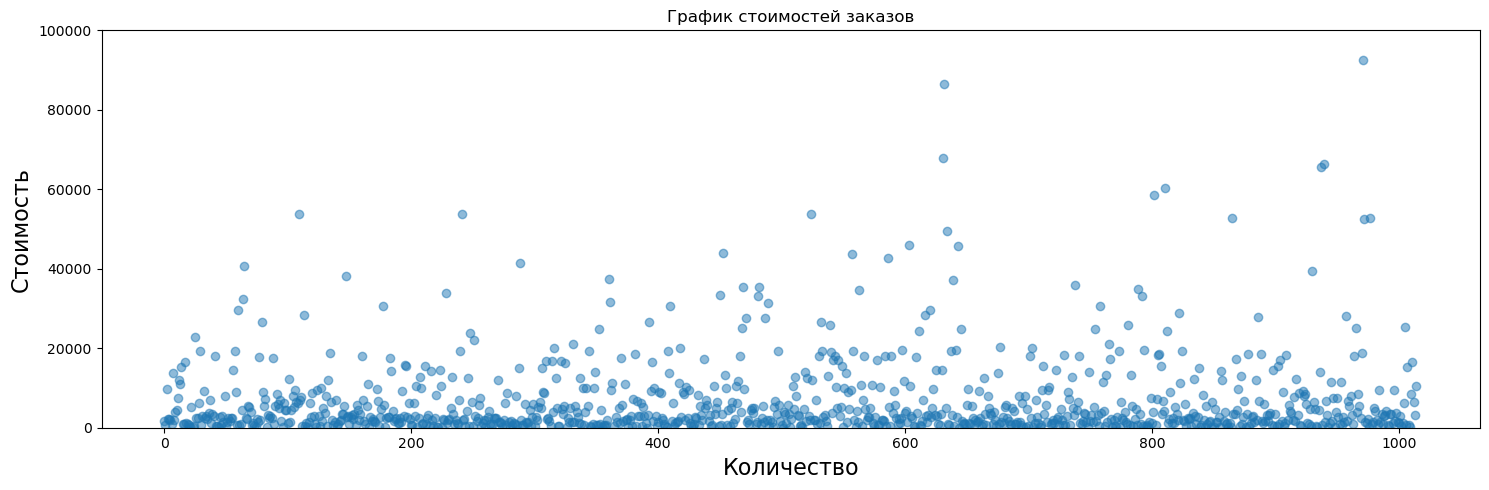

In [20]:
x_values = pd.Series(range(0, len(orders['revenue'])))
plt.figure(figsize=(15,5))
plt.title('График стоимостей заказов')
plt.scatter(x_values, orders['revenue'], alpha=0.5);
# добавляем подписи к осям и заголовок диаграммы
plt.xlabel('Количество', fontsize=16)
plt.ylabel('Стоимость', fontsize=16)
plt.ylim([0, 100000])

# оптимизируем поля и расположение объектов
plt.tight_layout()

plt.show()


Заказы дороже 40000 довольно редки, для более точного вывода расчитаем перцентили

**4.9 Посчитайте 95-й и 99-й перцентили стоимости заказов. Выберите границу для определения аномальных заказов.**

In [21]:
np.percentile(orders['revenue'], [95, 99])

array([26785., 53904.])

Не более 95% пользователей совершали заказы на сумму до 28000 и не более 99% совершали заказы на сумму до 588000. Граница - 50000 заказа.

**4.10 Посчитайте статистическую значимость различий в среднем количестве заказов на посетителя между группами по «сырым» данным. Сделайте выводы и предположения**

In [22]:


visitorsADaily = visitors[visitors['group'] == 'A'][['date', 'visitors']]
visitorsADaily.columns = ['date', 'visitorsPerDateA']

visitorsACummulative = visitorsADaily.apply(
    lambda x: visitorsADaily[visitorsADaily['date'] <= x['date']].agg(
        {'date': 'max', 'visitorsPerDateA': 'sum'}
    ),
    axis=1,
)
visitorsACummulative.columns = ['date', 'visitorsCummulativeA']

visitorsBDaily = visitors[visitors['group'] == 'B'][['date', 'visitors']]
visitorsBDaily.columns = ['date', 'visitorsPerDateB']

visitorsBCummulative = visitorsBDaily.apply(
    lambda x: visitorsBDaily[visitorsBDaily['date'] <= x['date']].agg(
        {'date': 'max', 'visitorsPerDateB': 'sum'}
    ),
    axis=1,
)
visitorsBCummulative.columns = ['date', 'visitorsCummulativeB']

ordersADaily = (
    orders[orders['group'] == 'A'][['date', 'transactionId', 'visitorId', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'transactionId': pd.Series.nunique, 'revenue': 'sum'})
)
ordersADaily.columns = ['date', 'ordersPerDateA', 'revenuePerDateA']

ordersACummulative = ordersADaily.apply(
    lambda x: ordersADaily[ordersADaily['date'] <= x['date']].agg(
        {'date': 'max', 'ordersPerDateA': 'sum', 'revenuePerDateA': 'sum'}
    ),
    axis=1,
).sort_values(by=['date'])
ordersACummulative.columns = [
    'date',
    'ordersCummulativeA',
    'revenueCummulativeA',
]

ordersBDaily = (
    orders[orders['group'] == 'B'][['date', 'transactionId', 'visitorId', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'transactionId': pd.Series.nunique, 'revenue': 'sum'})
)
ordersBDaily.columns = ['date', 'ordersPerDateB', 'revenuePerDateB']

ordersBCummulative = ordersBDaily.apply(
    lambda x: ordersBDaily[ordersBDaily['date'] <= x['date']].agg(
        {'date': 'max', 'ordersPerDateB': 'sum', 'revenuePerDateB': 'sum'}
    ),
    axis=1,
).sort_values(by=['date'])
ordersBCummulative.columns = [
    'date',
    'ordersCummulativeB',
    'revenueCummulativeB',
]

data = (
    ordersADaily.merge(
        ordersBDaily, left_on='date', right_on='date', how='left'
    )
    .merge(ordersACummulative, left_on='date', right_on='date', how='left')
    .merge(ordersBCummulative, left_on='date', right_on='date', how='left')
    .merge(visitorsADaily, left_on='date', right_on='date', how='left')
    .merge(visitorsBDaily, left_on='date', right_on='date', how='left')
    .merge(visitorsACummulative, left_on='date', right_on='date', how='left')
    .merge(visitorsBCummulative, left_on='date', right_on='date', how='left')
)

data.head(5)


,date,ordersPerDateA,revenuePerDateA,ordersPerDateB,revenuePerDateB,ordersCummulativeA,revenueCummulativeA,ordersCummulativeB,revenueCummulativeB,visitorsPerDateA,visitorsPerDateB,visitorsCummulativeA,visitorsCummulativeB
0,2019-08-01,23,142779,17,59758,23,142779,17,59758,719,713,719,713
1,2019-08-02,19,91602,23,162043,42,234381,40,221801,619,581,1338,1294
2,2019-08-03,24,112473,14,67049,66,346854,54,288850,507,509,1845,1803
3,2019-08-04,11,41176,14,96890,77,388030,68,385740,717,770,2562,2573
4,2019-08-05,22,86383,21,89908,99,474413,89,475648,756,707,3318,3280


Нулевая гипотеза: "статистически значимых различий в конверсии между группами нет"; альтернативная гипотеза - "статистически значимые различия есть". Пороговый уровень статистической значимости возьмём 5% Применяем тест Манна-Уитни.

In [23]:
ordersByUsersA = (
    orders[orders['group'] == 'A']
    .groupby('visitorId', as_index=False)
    .agg({'transactionId': pd.Series.nunique})
)
ordersByUsersA.columns = ['userId', 'orders']

ordersByUsersB = (
    orders[orders['group'] == 'B']
    .groupby('visitorId', as_index=False)
    .agg({'transactionId': pd.Series.nunique})
)
ordersByUsersB.columns = ['userId', 'orders'] 

sampleA = pd.concat([ordersByUsersA['orders'],pd.Series(0, index=np.arange(data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])), name='orders')],axis=0)

sampleB = pd.concat([ordersByUsersB['orders'],pd.Series(0, index=np.arange(data['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])), name='orders')],axis=0)

ordersByUsersA = (
    orders[orders['group'] == 'A']
    .groupby('visitorId', as_index=False)
    .agg({'transactionId': pd.Series.nunique})
)
ordersByUsersA.columns = ['userId', 'orders']

ordersByUsersB = (
    orders[orders['group'] == 'B']
    .groupby('visitorId', as_index=False)
    .agg({'transactionId': pd.Series.nunique})
)
ordersByUsersB.columns = ['userId', 'orders']

sampleA = pd.concat(
    [
        ordersByUsersA['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

sampleB = pd.concat(
    [
        ordersByUsersB['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)
print("p-value = {0:.5f}".format(stats.mannwhitneyu(sampleA, sampleB)[1]))

print("Относительный показатель 'B' и 'A' = {0:.3f}".format((data['ordersPerDateB'].sum()/data['visitorsPerDateB'].sum())/(data['ordersPerDateA'].sum()/data['visitorsPerDateA'].sum())-1))

p-value = 0.01102
Относительный показатель 'B' и 'A' = 0.160


P-value = 0.01102 меньше 0.05. Следовательно, нулевую гипотезу отвергаем. Это значит: по «сырым» данным различия в конверсии групп A и B есть. Положительная разница группы B над A равна 16% 

**4.11 Посчитайте статистическую значимость различий в среднем чеке заказа между группами по «сырым» данным. Сделайте выводы и предположения.**

Нулевая гипотеза: "статистически значимых различий в среднем чеке заказа между группами нет"; альтернативная гипотеза - "статистически значимые различия есть".

In [24]:
print('{0:.3f}'.format(stats.mannwhitneyu(orders[orders['group']=='A']['revenue'], orders[orders['group']=='B']['revenue'])[1]))
print('{0:.3f}'.format(orders[orders['group']=='B']['revenue'].mean()/orders[orders['group']=='A']['revenue'].mean()-1)) 

0.829
0.287


P-value больше 0.05. Значит, статистически значимых различий в среднем чеке заказа между группами нет по сырым данным. Средний чек группы B выше среднего чека группы A на 28%.

**4.12 Посчитайте статистическую значимость различий в среднем количестве заказов на посетителя между группами по «очищенным» данным. Сделайте выводы и предположения.**

In [25]:
usersWithManyOrders = pd.concat(
    [
        ordersByUsersA[ordersByUsersA['orders'] > 3]['userId'],
        ordersByUsersB[ordersByUsersB['orders'] > 3]['userId'],
    ],
    axis=0,
)
usersWithExpensiveOrders = orders[orders['revenue'] > 50000]['visitorId']
abnormalUsers = (
    pd.concat([usersWithManyOrders, usersWithExpensiveOrders], axis=0)
    .drop_duplicates()
    .sort_values()
)
print(abnormalUsers.head(5))

937    148427295 
972    759473111 
811    887908475 
632    888512513 
939    1164614297
dtype: int64


Нулевая гипотеза: "статистически значимых различий в конверсии между группами нет"; альтернативная гипотеза - "статистически значимые различия есть".

In [26]:
sampleAFiltered = pd.concat(
    [
        ordersByUsersA[
            np.logical_not(ordersByUsersA['userId'].isin(abnormalUsers))
        ]['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

sampleBFiltered = pd.concat(
    [
        ordersByUsersB[
            np.logical_not(ordersByUsersB['userId'].isin(abnormalUsers))
        ]['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
) 
print('{0:.5f}'.format(stats.mannwhitneyu(sampleAFiltered, sampleBFiltered)[1]))
print('{0:.3f}'.format(sampleBFiltered.mean()/sampleAFiltered.mean()-1)) 

0.00781
0.172


P-value = 0.01144 меньше 0.05. Следовательно, нулевую гипотезу отвергаем. Это значит: по «очищенным» данным различия в конверсии групп A и B есть. Положительная разница группы B над A равна 15.8% - выше, чем по сырым

**4.13 Посчитайте статистическую значимость различий в среднем чеке заказа между группами по «очищенным» данным. Сделайте выводы и предположения.**

Нулевая гипотеза: "статистически значимых различий в среднем чеке заказа между группами нет"; альтернативная гипотеза - "статистически значимые различия есть".

In [27]:
print(
    '{0:.3f}'.format(
        stats.mannwhitneyu(
            orders[
                np.logical_and(
                    orders['group'] == 'A',
                    np.logical_not(orders['visitorId'].isin(abnormalUsers)),
                )
            ]['revenue'],
            orders[
                np.logical_and(
                    orders['group'] == 'B',
                    np.logical_not(orders['visitorId'].isin(abnormalUsers)),
                )
            ]['revenue'],
        )[1]
    )
)

print(
    "{0:.3f}".format(
        orders[
            np.logical_and(
                orders['group'] == 'B',
                np.logical_not(orders['visitorId'].isin(abnormalUsers)),
            )
        ]['revenue'].mean()
        / orders[
            np.logical_and(
                orders['group'] == 'A',
                np.logical_not(orders['visitorId'].isin(abnormalUsers)),
            )
        ]['revenue'].mean()
        - 1
    )
) 

0.950
0.009


P-value больше 0.05. Статистически значимых различий в среднем чеке заказа между группами нет по очищенным данным. Средний чек группы B выше среднего чека группы A всего на 6%. 

**4.14 Примите решение по результатам теста и объясните его. Варианты решений:**
1. Остановить тест, зафиксировать победу одной из групп.
2. Остановить тест, зафиксировать отсутствие различий между группами.
3. Продолжить тест.

Конверсии:
- Между "сырыми" и "очищенными" данными в конверсии групп A и B есть различия. Положительная разница группы B над A равна 16.4% - выше, чем по сырым

Средний чек:
- Статистически значимых различий в среднем чеке заказа между группами нет по очищенным данным. Средний чек группы B выше среднего чека группы A всего на 6%, а по "сырым" данным он был больше на 26%. Оказывало влияние выбросов.

**Результаты тестирования - остановить тест и зафиксировать победу группы В, т.к. у группы B выше конверсия, при относительно равных средних чеках**

### Общий вывод

1. В ходе предобработки устаовлено:
- нет пропущенных значений в трех датасетах
- название столбцов в датасете hypothesis приведены к нижнему змеиному регистру
- в столбцах date в датасетах visiors, orders заменен тип на datetime для дальнейшей работы со временем
- осуществлена проверка на явные и неявные дубликаты - они отсутстуют

2. Приоритизация гипотез:
- Наиболее перспективной является гипотеза 7, она в лидерах после приоритезации в обоих фреймворках. Также можно еще рассмотреть 0-ую гипотезу по совокупности результатов приоритизации RICE, ICE.

3. Результаты A/B-тестирования:
- остановить тест и зафиксировать победу группы В, т.к. у группы B выше конверсия, при относительно равных средних чеках
